<a href="https://colab.research.google.com/github/mona-gomaa/Ai_computer_vision/blob/computer_vision/img_cutting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [4]:

# Load the image
image = cv2.imread('image.jpeg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)




<BarContainer object of 256 artists>

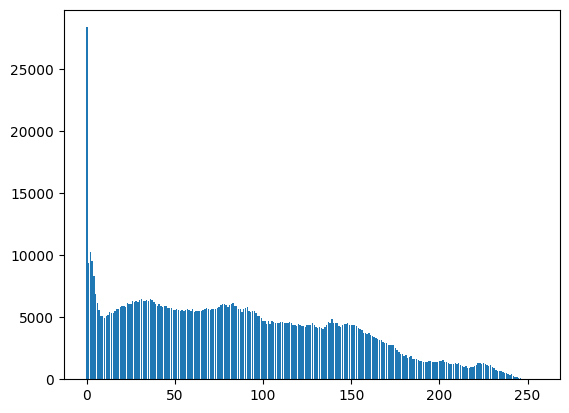

In [ ]:
hist,bins = np.histogram(image.ravel(),bins=256,range=[0,255])#ravel() = flatten()

plt.bar(x=range(256), height=hist)

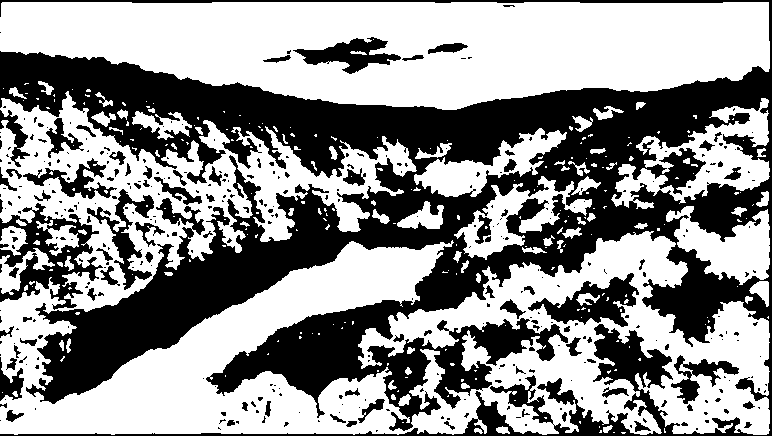

In [ ]:

adaptive_threshold = cv2.adaptiveThreshold(
    blurred_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 111, 2
)
cv2_imshow(adaptive_threshold)

no of shape 1


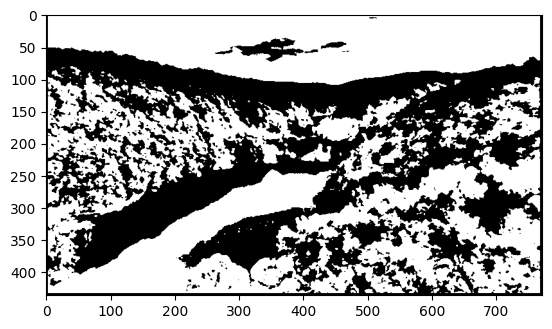

In [ ]:
# # Perform edge detection using the Canny edge detector
# edges = cv2.Canny(blurred_img, threshold1=30, threshold2=70)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(blurred_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("no of shape {0}".format(len(contours)))

for cont in contours:
    rect = cv2.minAreaRect(cont)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(adaptive_threshold,[box],0,(0,255,0),3)

plt.imshow(img,cmap='gray')

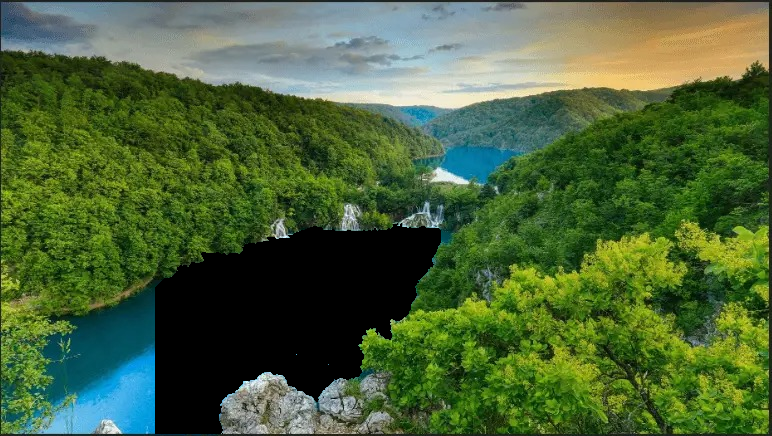

In [59]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('image.jpeg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Create a mask and initialize it
mask = np.zeros(blurred_img.shape[:2], dtype=np.uint8)

# Define a rectangle around the object to be removed (you can adjust these values)
x = 155
y = 155
width = 350
height = 350
rect = (x, y, width, height)

# Apply GrabCut algorithm
bgdModel = np.zeros((1, 65), dtype=np.float64)
fgdModel = np.zeros((1, 65), dtype=np.float64)
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to classify the regions as either definite background or probable background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Create a new image with blue regions changed to black
modified_image = image.copy()
modified_image[mask2 > 0] = [0, 0, 0]

# Display the modified image using the Colab display function
cv2_imshow(modified_image)


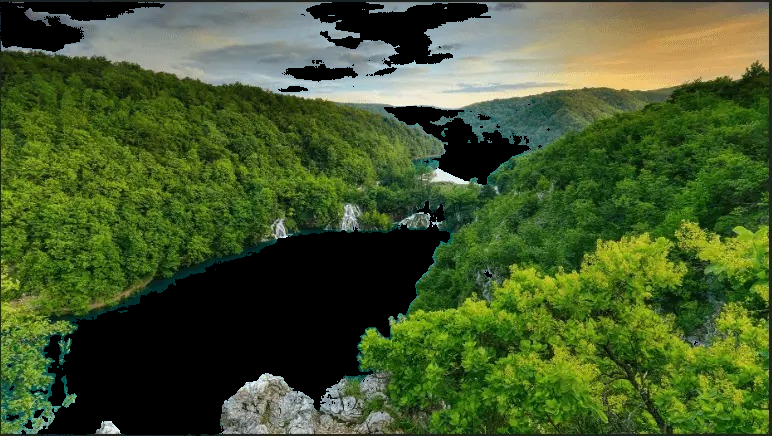

In [64]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('image.jpeg')

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of colors similar to blue (you can adjust these values)
lower_bound = np.array([90, 50, 50])  # Lower bound of blue color in HSV
upper_bound = np.array([130, 255, 255])  # Upper bound of blue color in HSV

# Create a binary mask based on the defined color range
mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

# Set the masked regions to black in the original image
image[mask > 0] = [0, 0, 0]

# Display the modified image using the Colab display function
cv2_imshow(image)
